### <b>Importing Dependancies

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [76]:
# Set Random seed for reproducibility
np.random.seed(42)

In [77]:
df = pd.read_csv('D:/MernAnalytics/Churn/data/telecom_churn_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
# Checking the dataset's dimensions
df.shape

(7043, 21)

### <b>Descriptive statistics

#### Display basic information about the dataset

In [79]:
print('\nDataset info:')
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [80]:
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [81]:
print("\nDescriptive Statistics for Categorical Features:")
print(df.describe(include='object'))


Descriptive Statistics for Categorical Features:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No  

### <b>Exploratory Data Analysis (EDA)

#### Visualize Churn Distribution

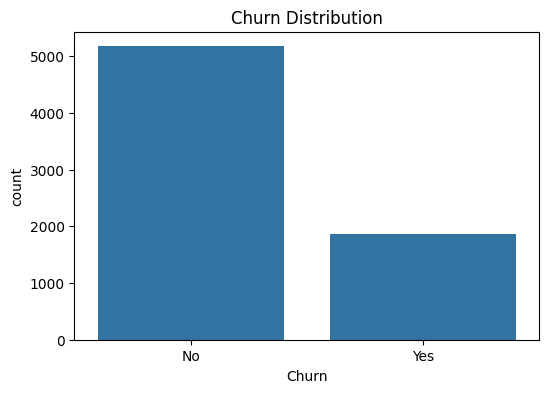

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
#plt.savefig('churn_distribution.png')
plt.show()

#### Visualize Numerical features

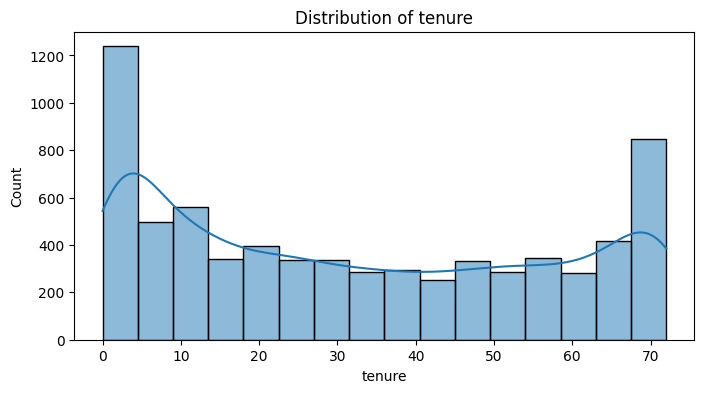

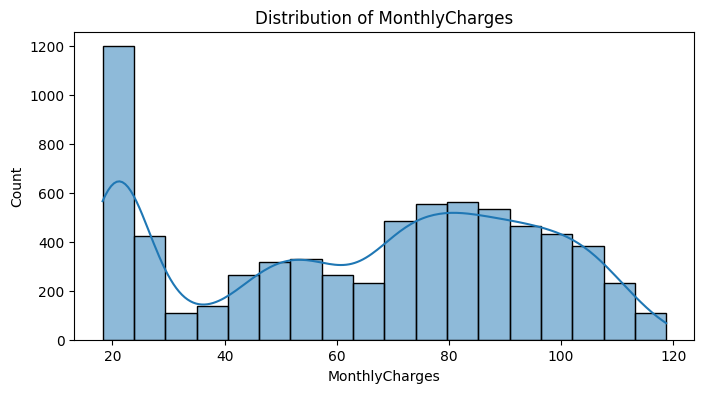

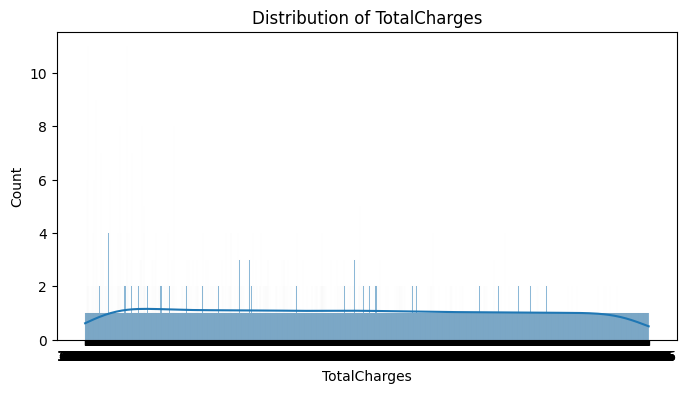

In [83]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    #plt.savefig(f'{feature}_distribution.png')
    plt.show()

#### Visualize categorical features vs Churn

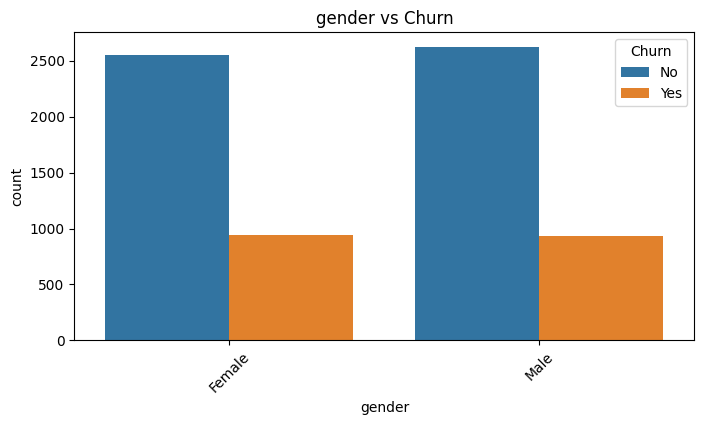

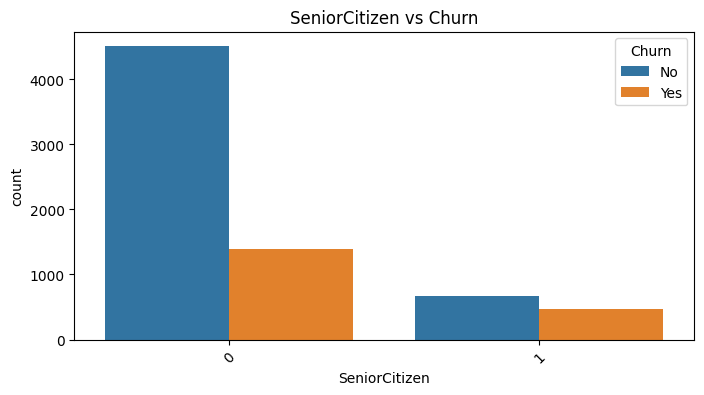

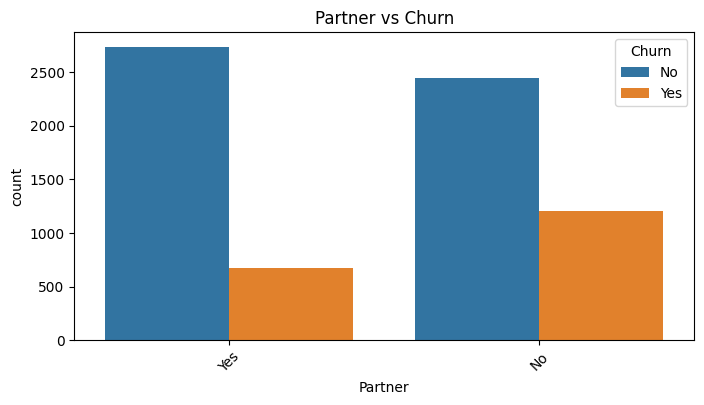

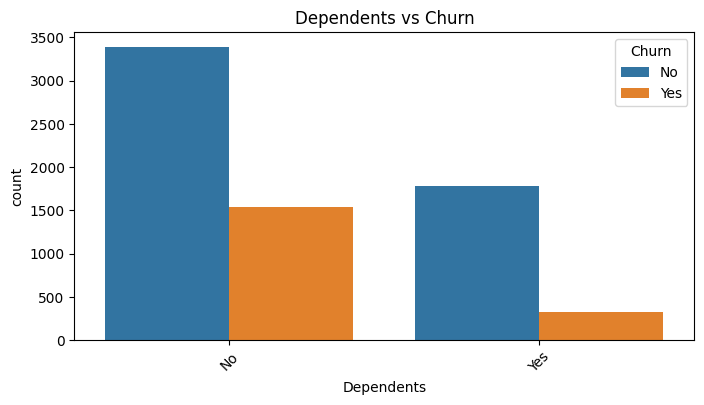

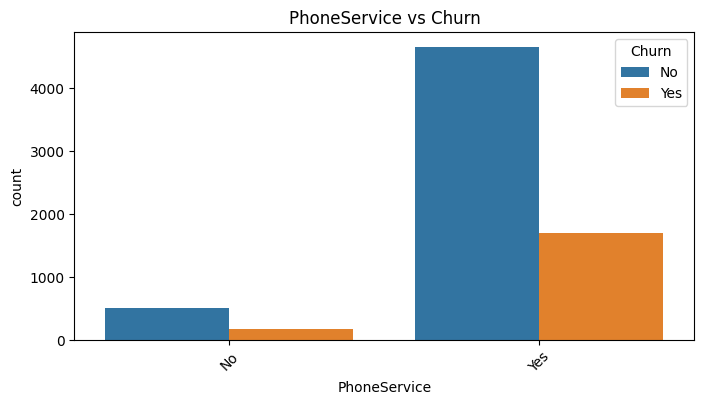

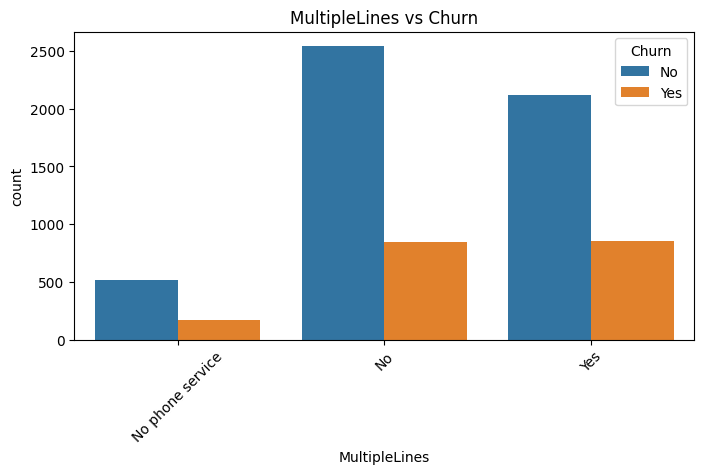

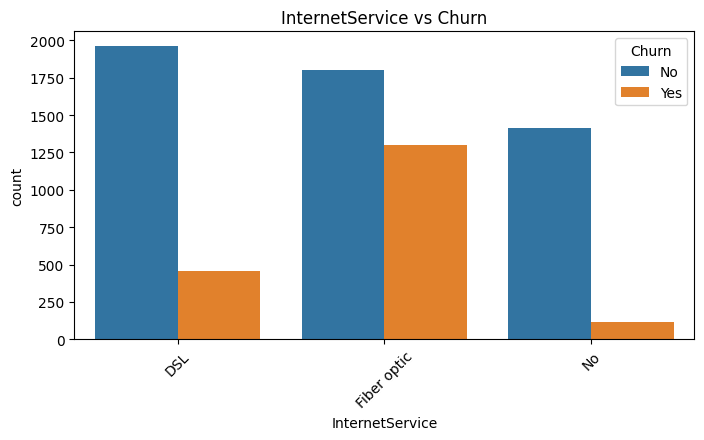

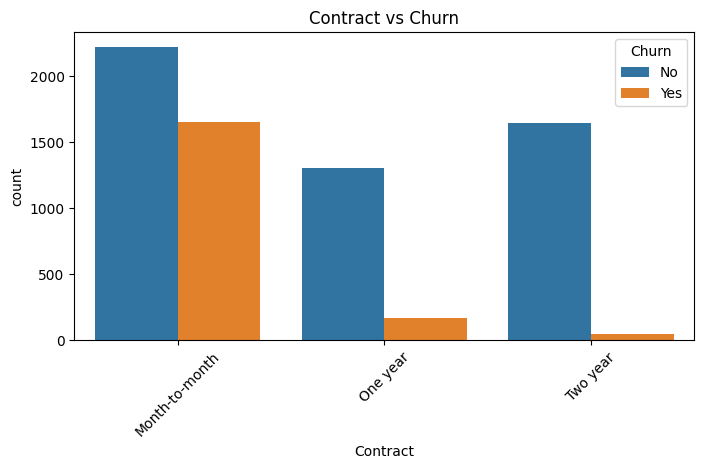

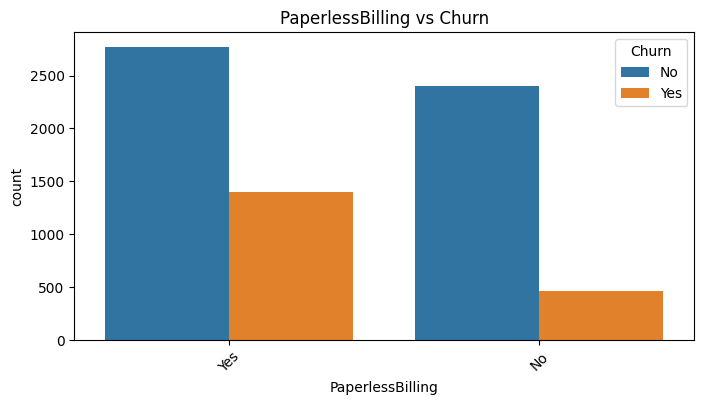

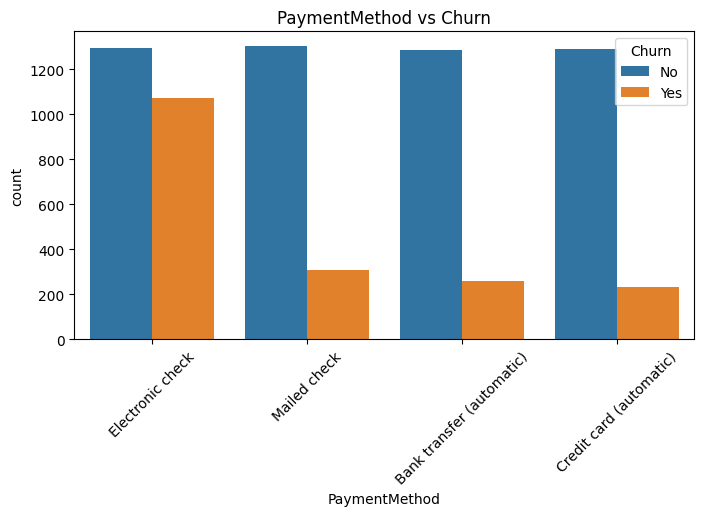

In [84]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for features in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=features, hue='Churn', data=df)
    plt.title(f'{features} vs Churn')
    plt.xticks(rotation=45)
    #plt.savefig(f'{features}_vs_Churn.png')
    plt.show()

### <b>Feature Engineering

#### Handle missing values

In [85]:
# Checking on data types for preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [86]:
# Converting the Total charges data type to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [87]:
# Checking for null values

df['TotalCharges'].isna().sum()

np.int64(11)

In [88]:
# Filling the null values with median

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [89]:
df['TotalCharges'].isna().sum()

np.int64(0)

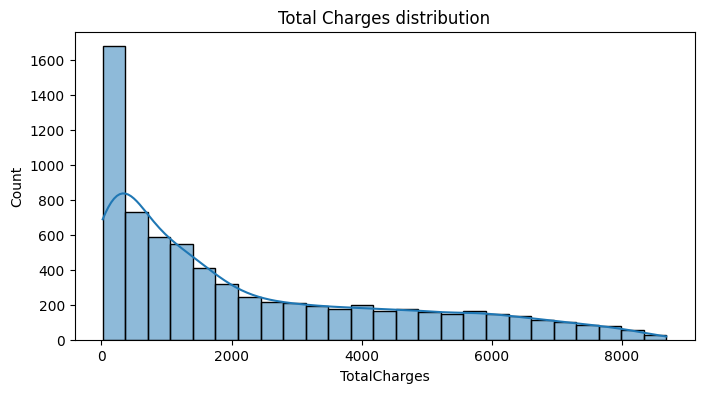

In [90]:
# Visualizing the distribution after filling with median

plt.figure(figsize=(8,4))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Total Charges distribution')
#plt.savefig('total_charges_distribution.png')
plt.show()

### <b>Correlation Analysis and HeatMap

#### Select numerical features for correlation

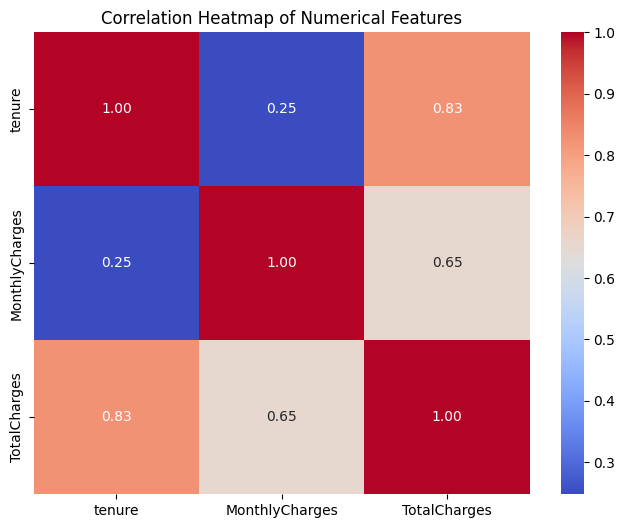

In [91]:
# Correlation Heatmap

corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt= '.2f')
plt.title('Correlation Heatmap of Numerical Features')
#plt.savefig('correlation_heatmap.png')
plt.show()

### <b>Encoding

#### Encode categorical variables using one-hot encoding. 
  
  #### Drop customerID as it's not useful for modeling

In [92]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [93]:
df = df.drop('customerID', axis=1)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Churn')
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

#### Encode target variable (Churn) - Label Encoding

In [94]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [95]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


#### Split the dataset

In [96]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#### Feature Scaling

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Simple Logistic Regression

In [98]:
X_simple = df[['tenure']]
y = df['Churn']

In [99]:
# SLR with one predictor variable
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [100]:
simple_lr1 = LogisticRegression(random_state=42)
simple_lr1.fit(X_train_simple, y_train)
y_pred_simple = simple_lr1.predict(X_test_simple)
print(y_pred_simple, y_test)

[0 0 0 ... 0 0 0] 185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64


In [101]:
# Evaluate the Model
print(f'\nSimple Logistic Regression (Single Feature: tenure) Performance:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_simple):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_simple):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_simple):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_simple):.4f}')
print(f'ROC-AUC: {roc_auc_score(y_test, simple_lr1.predict_proba(X_test_simple)[:, 1]):.4f}')


Simple Logistic Regression (Single Feature: tenure) Performance:
Accuracy: 0.7346
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.7574


##### Visualize Simple Logistic Regression

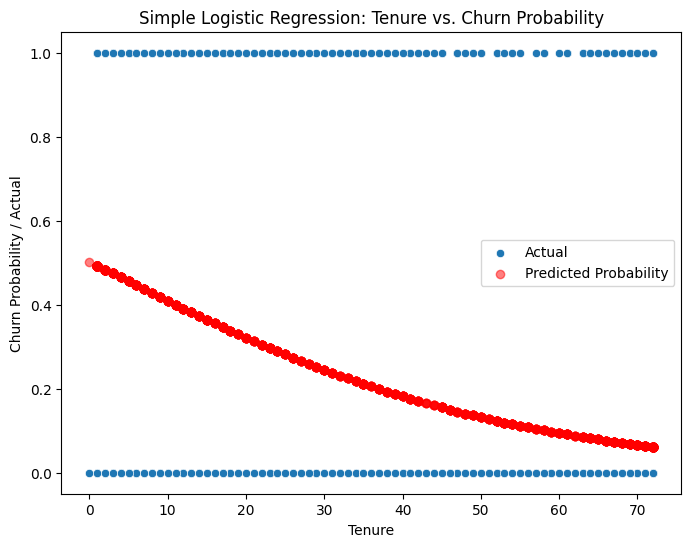

In [102]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_simple['tenure'], y=y_test, label='Actual')
plt.scatter(X_test_simple['tenure'], simple_lr1.predict_proba(X_test_simple)[:, 1], color='red', alpha=0.5, label='Predicted Probability')
plt.title('Simple Logistic Regression: Tenure vs. Churn Probability')
plt.xlabel('Tenure')
plt.ylabel('Churn Probability / Actual')
plt.legend()
#plt.savefig('simple_lr_decision_boundary.png')
plt.show()


#### Multiple Logistic Regression

In [103]:
X_robust = df.drop('Churn', axis=1)
y = df['Churn']

In [104]:
X_train_robust, X_test_robust, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)

In [105]:
scaler = StandardScaler()
X_train_robust_scaled = scaler.fit_transform(X_train_robust)
X_test_robust_scaled = scaler.transform(X_test_robust)

In [106]:
robust_lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
robust_lr.fit(X_train_robust_scaled, y_train)
y_pred_robust = robust_lr.predict(X_test_robust_scaled)

In [107]:
# Evaluate the Model
print("\nRobust Binary Logistic Regression Perfomance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_robust):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_robust):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_robust):.4f}")
print(f"F1_Score: {f1_score(y_test, y_pred_robust):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, robust_lr.predict_proba(X_test_robust_scaled)[:,1]):.4f}")


Robust Binary Logistic Regression Perfomance:
Accuracy: 0.8197
Precision: 0.6831
Recall: 0.5952
F1_Score: 0.6361
ROC-AUC: 0.8620


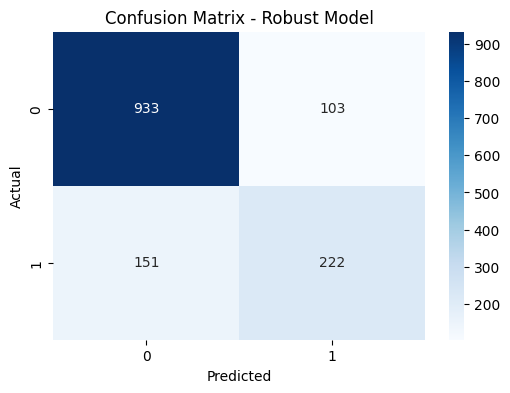

In [108]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_robust)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Robust Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig('confusion_matrix_robust.png')
plt.show()

### Feature Importance (For Interpretation)

In [109]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': robust_lr.coef_[0]
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance (Top 10):")
print(feature_importance.head(10))


Feature Importance (Top 10):
                           Feature  Coefficient
3                     TotalCharges     0.625566
10     InternetService_Fiber optic     0.623613
23             StreamingMovies_Yes     0.230698
21                 StreamingTV_Yes     0.180636
9                MultipleLines_Yes     0.169273
26            PaperlessBilling_Yes     0.163631
28  PaymentMethod_Electronic check     0.152353
0                    SeniorCitizen     0.058605
8   MultipleLines_No phone service     0.034425
17            DeviceProtection_Yes     0.028572


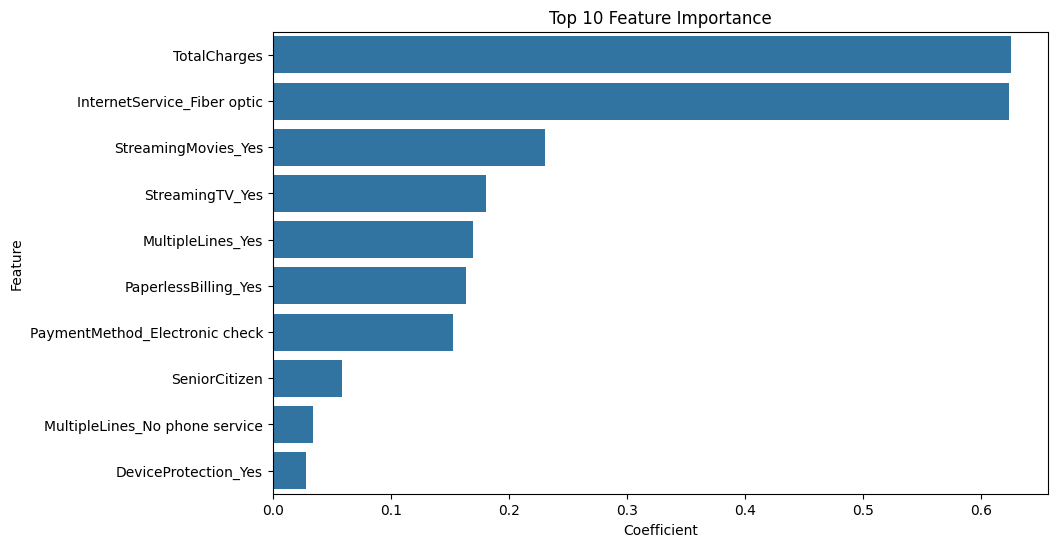

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
#plt.savefig('feature_importance.png')
plt.show()

In [ ]:
# Save the model
import joblib
joblib.dump(robust_lr, 'churn_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

### Production Notes

- Load model: model = joblib.load('churn_prediction_model.pkl')
  
- Load scaler: scaler = joblib.load('scaler.pkl')
  
- Preprocess new data similarly (one-hot encoding, scaling)
  
- Predict: model.predict(scaler.transform(new_data))